<p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold"><br>
Data Analitycs</p><br>

In [1]:
from localpacks.data import get_data

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = get_data(parse_date=True, clean=True)

In [3]:
df.head(3)

,user_id,platform,country_region,city,gender,min_age_range,max_age_range,event_1,event_2,event_3,event_4,event_5,target_churn_indicator
install_time,,,,,,,,,,,,,
2018-07-04 19:24:24,2ba6f357,Android,Santa Cruz,Río Gallegos,male,13,17,1,2,0,1,1,0
2018-07-02 21:08:33,7baa10b6,Android,Buenos Aires,Don Torcuato,female,13,17,5,6,0,2,5,0
2018-07-07 04:18:47,120d379,Android,Santiago del Estero,Santiago del Estero,female,13,17,8,12,0,2,3,0


### Users

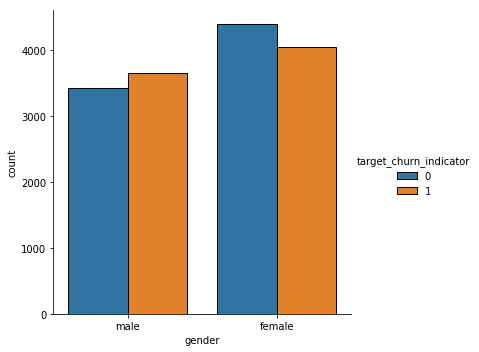

In [4]:
#Users by gender and class
sns.catplot(x='gender', data = df, kind = "count", hue='target_churn_indicator', edgecolor='black', linewidth = 1.0,);

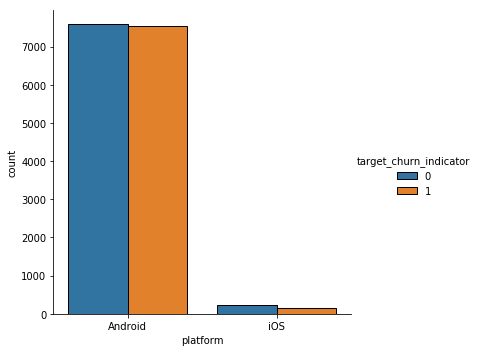

In [5]:
#Users by platform and class
sns.catplot(x='platform', data = df, kind = "count", hue='target_churn_indicator', edgecolor='black', linewidth = 1.0);

### Time reference 

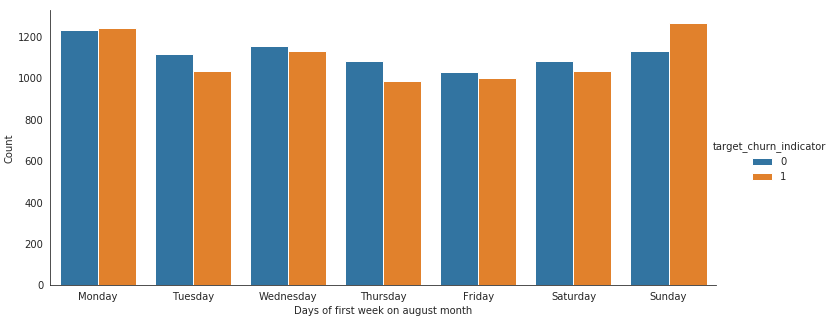

In [19]:
with sns.axes_style('white'):
    g = sns.catplot(x=df.index.day, hue='target_churn_indicator', data=df, aspect=2, kind="count")
    g.set_ylabels('Count')
    g.set_xlabels('Days of first week on august month')
    g.set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']);

### Age Range 

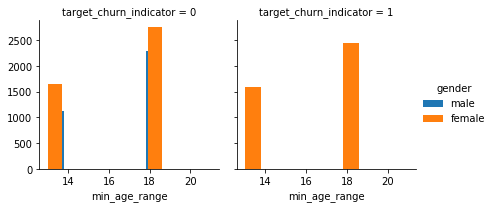

In [37]:
#min range
g = sns.FacetGrid(df, col='target_churn_indicator', hue='gender')
g.map(plt.hist, ('min_age_range'))
g.add_legend();

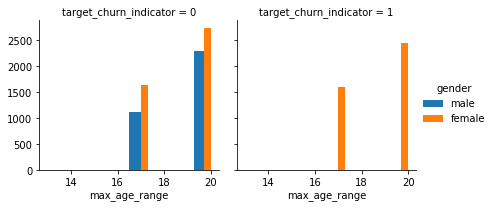

In [48]:
#max range
g = sns.FacetGrid(df, col='target_churn_indicator', hue='gender')
g.map(plt.hist, ('max_age_range'))
g.add_legend();

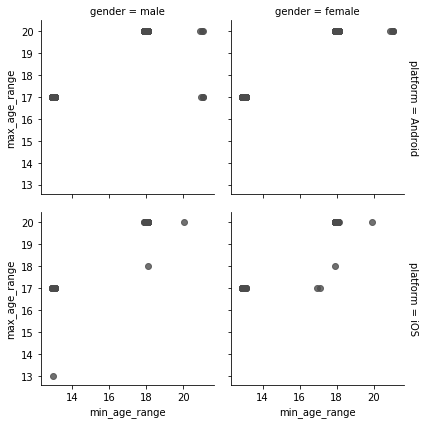

In [22]:
g = sns.FacetGrid(df, row="platform", col="gender", margin_titles=True)
g.map(sns.regplot, 'min_age_range', 'max_age_range', color=".3", fit_reg=False, x_jitter=.1);